# Lab 02
Họ tên: Tăng Gia Hân

MSSV: 22520394

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DS102/BTTH2/data.csv', sep=";")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Preprocessing data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
course_mapping = data['Course'].unique()
course_mapping = {course_mapping[i]: i for i in range(len(course_mapping))}

data['Course'] = data['Course'].map(course_mapping)

In [6]:
continuous_features = [
  'Previous qualification (grade)',
  'Admission grade',
  'Curricular units 1st sem (grade)',
  'Curricular units 2nd sem (grade)',
  'Unemployment rate',
  'Inflation rate',
  'GDP'
  ]

for col in continuous_features:
  data[col] = (data[col] - data[col].mean()) / data[col].std()
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,Dropout
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,Graduate
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,Dropout
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,Graduate
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,Graduate
4420,1,1,2,3,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,Dropout
4421,1,1,1,6,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,Dropout
4422,1,1,1,13,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,Graduate


In [7]:
from typing import Tuple

def split_data(data: np.ndarray, target_col: int = -1, train_ratio: float = 0.8) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  N = data.shape[0]
  train_size = int(train_ratio * N)

  train_data, test_data = np.split(data, [train_size])

  X_train, X_test = train_data[:, :target_col], test_data[:, :target_col]
  y_train, y_test = train_data[:, target_col], test_data[:, target_col]

  return X_train, X_test, y_train, y_test


# Câu 1

In [8]:
from tqdm import tqdm

class LogisticRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []

  def sigmoid(self, z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))

  def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()

  def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return (1 - np.abs(y - y_hat).mean())

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    n = X.shape[0]
    d = X.shape[1]
    self.theta = np.zeros((d, 1))
    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        # forward
        pb.set_description(f"Epoch {e+1}")
        y_hat = self.predict(X)
        # backward
        diff = y_hat - y
        gradient = 1/n * np.matmul(X.T, diff)
        self.theta -= self.lr * gradient

        # evaluating
        y_hat = self.predict(X)
        loss = self.loss_fn(y, y_hat)
        acc = self.accuracy(y, y_hat)
        pb.set_postfix({
            "loss": loss,
            "acc": acc
        })
        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.ndarray:
    z = np.matmul(X, self.theta)
    y_hat = self.sigmoid(z)
    return y_hat

In [9]:
df1 = data.copy()

In [10]:
def encode_target(value: str) -> int:
  if value == 'Enrolled' or value == 'Dropout':
    return 0
  return 1

In [11]:
df1['Target'] = df1['Target'].apply(encode_target)

In [12]:
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1


In [13]:
X_train, X_test, y_train, y_test = split_data(df1.to_numpy())

In [14]:
X_train.shape

(3539, 36)

In [15]:
y_train.shape

(3539,)

In [16]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(3539, 1)

In [17]:
y_test = y_test.reshape(-1, 1)
y_test.shape

(885, 1)

In [18]:
logistic_reg = LogisticRegression(1000, 0.005)

In [19]:
logistic_reg.fit(X_train, y_train)

Epoch 1000: 100%|██████████| 1000/1000 [00:02<00:00, 373.14it/s, loss=0.368, acc=0.754]


In [20]:
predicted = logistic_reg.predict(X_test)
print('Accuracy: ',logistic_reg.accuracy(y_test, predicted))

Accuracy:  0.7510519076765458


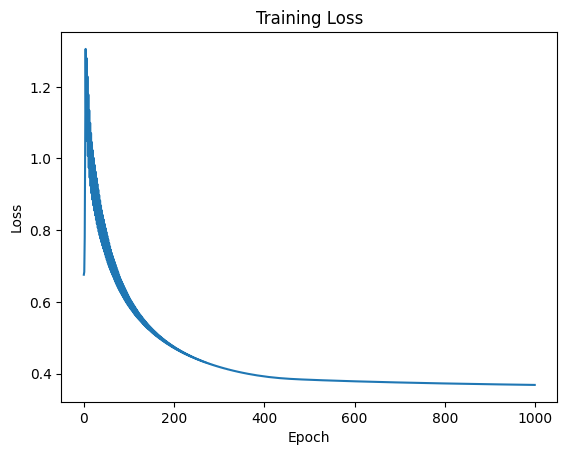

In [21]:
# Plot the loss values
plt.plot(logistic_reg.losses, label = 'loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Câu 2

In [22]:
class SoftmaxRegression():
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []

  def softmax(self, z: np.ndarray) -> np.ndarray:
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

  def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return -(y * np.log(y_hat + 1e-6)).sum(axis=-1).mean()

  def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return (1 - np.abs(y - y_hat)).mean()

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    n = X.shape[0]
    d = X.shape[1]
    n_classes = y.shape[-1]
    self.theta = np.zeros((d, n_classes))
    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        # forward
        pb.set_description(f"Epoch {e+1}")
        s = self.predict(X)
        # backward
        diff = s - y
        gradient = 1/n * np.matmul(X.T, diff)
        self.theta -= self.lr * gradient

        # evaluating
        s = self.predict(X)
        loss = self.loss_fn(y, s)
        acc = self.accuracy(y.argmax(axis=-1), s.argmax(axis=-1))
        pb.set_postfix({
            "loss": loss,
            "acc": acc
        })
        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.ndarray:
    z = np.matmul(X, self.theta)
    y_hat = self.softmax(z)
    return y_hat

In [23]:
df2 = data.copy()

In [24]:
def encode_target2(value: str) -> int:
  if value == 'Enrolled':
      return 0
  if value == 'Dropout':
      return 1
  return 2

In [25]:
df2["Target"] = df2["Target"].apply(encode_target2)

In [26]:
df2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,2
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,2
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,2


In [27]:
def one_hot_encode(y: np.ndarray, num_classes: int) -> np.ndarray:
  one_hot = np.zeros((y.shape[0], num_classes))
  one_hot[np.arange(y.shape[0]), y.astype(int).flatten()] = 1
  return one_hot

In [28]:
X_train, X_test, y_train, y_test = split_data(df2.to_numpy())
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [29]:
num_classes = 3
y_train = one_hot_encode(y_train, num_classes)
y_test = one_hot_encode(y_test, num_classes)

In [30]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [31]:
sof_reg = SoftmaxRegression(5000, 0.01)
sof_reg.fit(X_train, y_train)

Epoch 5000: 100%|██████████| 5000/5000 [00:32<00:00, 154.03it/s, loss=0.628, acc=0.662]


In [32]:
predicted = sof_reg.predict(X_test)
print('Accuracy: ',sof_reg.accuracy(y_test, predicted))

Accuracy:  0.7924102659319265


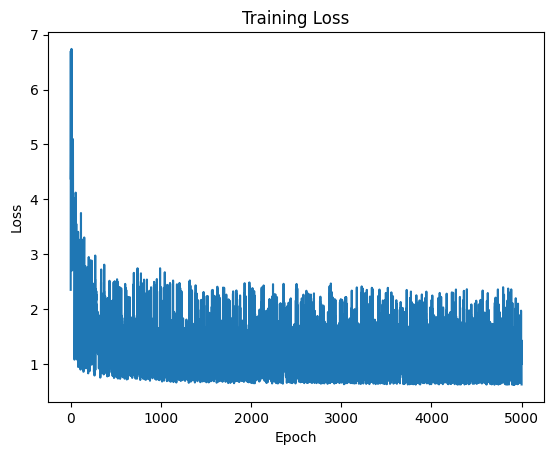

In [33]:
plt.plot(sof_reg.losses, label = 'loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Câu 3

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [35]:
df3 =  pd.read_csv('/content/drive/MyDrive/DS102/BTTH2/data.csv', sep=";")
df3.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [36]:
df3['Course'] = df3['Course'].astype('category').cat.codes

In [37]:
continuous_features = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
scaler = StandardScaler()
df3[continuous_features] = scaler.fit_transform(df3[continuous_features])

df3.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,-0.804841,1,19,12,...,0,0,0,0,-1.963489,0,-0.287638,0.124386,0.765761,Dropout
1,1,15,1,10,1,1,2.076819,1,1,3,...,0,6,6,6,0.659562,0,0.876222,-1.105222,0.347199,Graduate
2,1,1,5,4,1,1,-0.804841,1,37,37,...,0,6,0,0,-1.963489,0,-0.287638,0.124386,0.765761,Dropout
3,1,17,2,14,1,1,-0.804841,1,38,37,...,0,6,10,5,0.416450,0,-0.813253,-1.466871,-1.375511,Graduate
4,2,39,1,2,0,1,-2.473171,1,37,38,...,0,6,6,6,0.531608,0,0.876222,-1.105222,0.347199,Graduate


## Logistic regression

In [38]:
df3_log_reg = df3.copy()

In [39]:
df3_log_reg['Target'] = df3_log_reg['Target'].apply(encode_target)
X = df3_log_reg.drop(columns=['Target'])
y = df3_log_reg['Target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [41]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8406779661016949


## Softmax Regression

In [42]:
df3_sof_reg = df3.copy()

In [43]:
df3_sof_reg['Target'] = df3_sof_reg['Target'].apply(encode_target2)
X = df3_sof_reg.drop(columns=['Target'])
y = df3_sof_reg['Target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [45]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)
print("Softmax Regression Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Softmax Regression Accuracy: 0.7491525423728813
